In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import os
from PIL import Image
import random

In [27]:
# sapi
# direktori train test
train_dir= r'D:\BANGKIT2023\CAPSTONE\sapiseimbang\train'
test_dir= r'D:\BANGKIT2023\CAPSTONE\sapiseimbang\test'

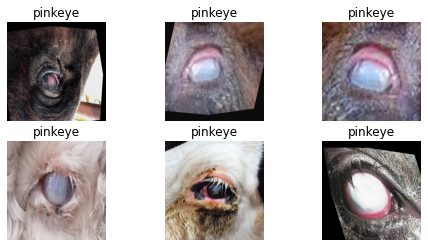

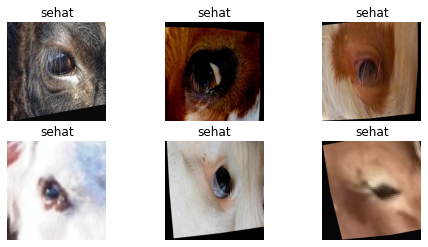

In [28]:
# list nama kelas
class_name = 'pinkeye'
class_name2 = 'sehat'

# list path gambar pada kelas yang dipilih
image_paths = os.listdir(os.path.join(train_dir, class_name))
image_paths2 = os.listdir(os.path.join(train_dir, class_name2))

# memilih 6 gambar secara acak dari kelas yang dipilih
image_paths = random.sample(image_paths, 6)
image_paths2 = random.sample(image_paths2, 6)

# menampilkan 6 gambar dari kelas yang dipilih
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    img = image.load_img(os.path.join(train_dir, class_name, image_paths[i]))
    ax.imshow(img)
    ax.set_title(f"{class_name}")
    ax.axis('off')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    img = image.load_img(os.path.join(train_dir, class_name2, image_paths2[i]))
    ax.imshow(img)
    ax.set_title(f"{class_name2}")
    ax.axis('off')
plt.show()

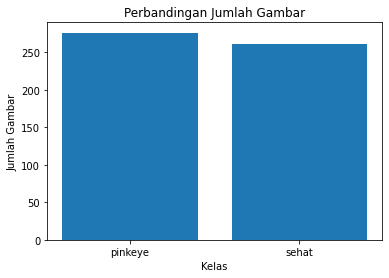

jumlah gambar sapi pinkeye =  276
jumlah gambar sapi sehat =  261


In [29]:
class_names = ['pinkeye', 'sehat']

# menghitung jumlah gambar pada setiap kelas
num_images = []
for class_name in class_names:
    num_images.append(len(os.listdir(os.path.join(train_dir, class_name))))

# menampilkan grafik perbandingan jumlah gambar pada dua kelas
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(class_names, num_images)
ax.set_title('Perbandingan Jumlah Gambar')
ax.set_xlabel('Kelas')
ax.set_ylabel('Jumlah Gambar')
plt.show()
print('jumlah gambar sapi pinkeye = ',num_images[0])
print('jumlah gambar sapi sehat = ',num_images[1])

In [30]:
# ukuran gambar dan batch nantinya
image_size = 224
batch_size = 32

In [31]:
# augmentasi data train
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=24,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   zoom_range=0.2,
                                   horizontal_flip=False)

# yang tes cmn rescale aja
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
# mempersiapkan data di preprosesing untuk train dan tes nantinya
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(image_size, image_size),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(image_size, image_size),
                                                  batch_size=batch_size,
                                                  class_mode='binary')


Found 537 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


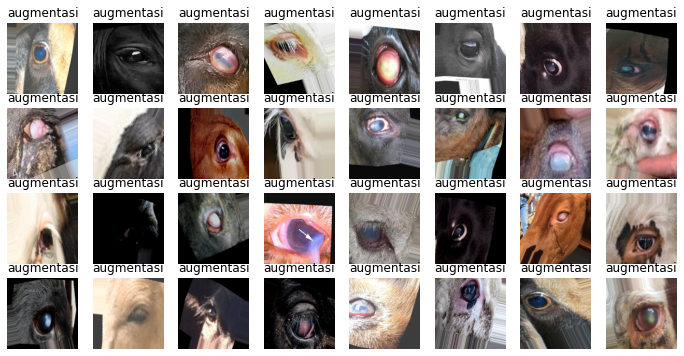

Jumlah gambar hasil augmentasi: 544


In [33]:
augmented_images, _ = train_generator.next()

# memvisualisasikan gambar setelah augmentasi
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.set_title('augmentasi')
    ax.imshow(augmented_images[i])
    ax.axis('off')
plt.show()
num_augmented_images = len(train_generator)* batch_size
print("Jumlah gambar hasil augmentasi:", num_augmented_images)

In [34]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

In [35]:
for layer in base_model.layers:
    layer.trainable = False

In [36]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [37]:
model.compile(optimizer=Adam(), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [38]:
num_epochs = 20
import math
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=math.ceil(validation_generator.samples / batch_size) 
)

Epoch 1/20
16/16 [==============================] - 20s 1s/step - loss: 0.5386 - accuracy: 0.7465 - val_loss: 0.4897 - val_accuracy: 0.6429
Epoch 2/20
16/16 [==============================] - 15s 895ms/step - loss: 0.3524 - accuracy: 0.8416 - val_loss: 0.3318 - val_accuracy: 0.9643
Epoch 3/20
16/16 [==============================] - 15s 914ms/step - loss: 0.2508 - accuracy: 0.9050 - val_loss: 0.2955 - val_accuracy: 0.9643
Epoch 4/20
16/16 [==============================] - 14s 881ms/step - loss: 0.2498 - accuracy: 0.8832 - val_loss: 0.3494 - val_accuracy: 0.8571
Epoch 5/20
16/16 [==============================] - 15s 885ms/step - loss: 0.2107 - accuracy: 0.9248 - val_loss: 0.3175 - val_accuracy: 0.8929
Epoch 6/20
16/16 [==============================] - 14s 883ms/step - loss: 0.1923 - accuracy: 0.9168 - val_loss: 0.3024 - val_accuracy: 0.8929
Epoch 7/20
16/16 [==============================] - 14s 887ms/step - loss: 0.1758 - accuracy: 0.9287 - val_loss: 0.3848 - val_accuracy: 0.7500
Ep

In [39]:
test_loss, test_acc = model.evaluate(validation_generator)
print('akurasi:', test_acc)

1/1 [==============================] - 1s 670ms/step - loss: 0.3163 - accuracy: 0.8929
akurasi: 0.8928571343421936


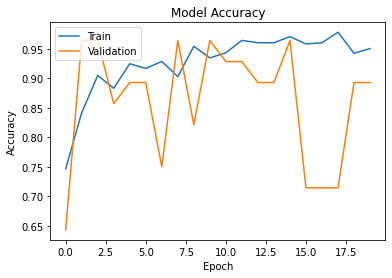

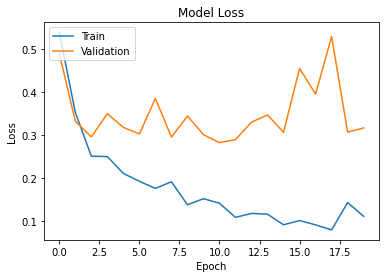

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 [==============================] - 1s 765ms/step
Confusion Matrix:
[[17  2]
 [ 1  8]]
1/1 [==============================] - 1s 629ms/step


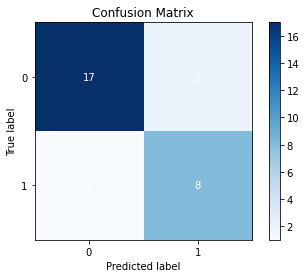

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions for the test set
test_images, test_labels = validation_generator.next() 
predictions = model.predict(test_images)  

# Convert predicted probabilities to class labels
predicted_labels = np.where(predictions > 0.5, 1, 0)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

# Generate predictions for the test set
test_images, test_labels = validation_generator.next()
predictions = model.predict(test_images) 

# Convert predicted probabilities to class labels
predicted_labels = np.where(predictions > 0.5, 1, 0)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the confusion matrix as a table
im = ax.imshow(cm, cmap='Blues')

# Customize the plot
ax.set_xticks(np.arange(len(cm[0])))
ax.set_yticks(np.arange(len(cm)))
ax.set_xticklabels(['0', '1'])
ax.set_yticklabels(['0', '1'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Add labels to each cell in the table
for i in range(len(cm)):
    for j in range(len(cm[0])):
        text = ax.text(j, i, cm[i, j],
                       ha='center', va='center', color='white')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title
ax.set_title('Confusion Matrix')

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

1/1 [==============================] - 1s 765ms/step
Confusion Matrix:
[[17  2]
 [ 1  8]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        19
         1.0       0.80      0.89      0.84         9

    accuracy                           0.89        28
   macro avg       0.87      0.89      0.88        28
weighted avg       0.90      0.89      0.89        28



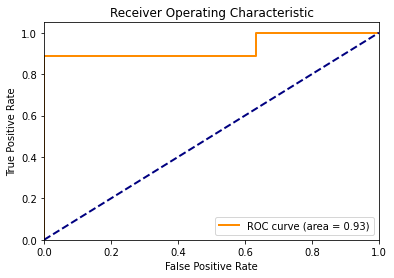

In [51]:

# Generate predictions for the test set
test_images, test_labels = validation_generator.next()
predictions = model.predict(test_images)

# Convert predicted probabilities to class labels
predicted_labels = np.where(predictions > 0.5, 1, 0)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Compute classification report
report = classification_report(test_labels, predicted_labels)
print("Classification Report:")
print(report)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 1s 1s/step


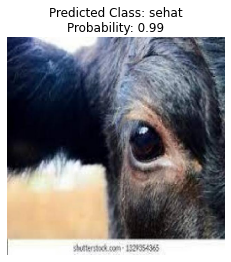

In [45]:
import matplotlib.pyplot as plt

# ambil dan prepros
test_image_path = r'D:\BANGKIT2023\CAPSTONE\sapires\test\sehat\bmbm__jpg.rf.d751e9e0eb8ecc3ac0abcf9f245852f2.jpg'
test_image = image.load_img(test_image_path, target_size=(image_size, image_size))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0 

# Memprediksi
predictions = model.predict(test_image)

# probability
predicted_class = "pinkeye" if predictions[0][0] < 0.5 else "sehat"
probability = predictions[0][0]

# tampil
plt.imshow(test_image[0])
plt.title(f'Predicted Class: {predicted_class}\nProbability: {probability:.2f}')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 67ms/step


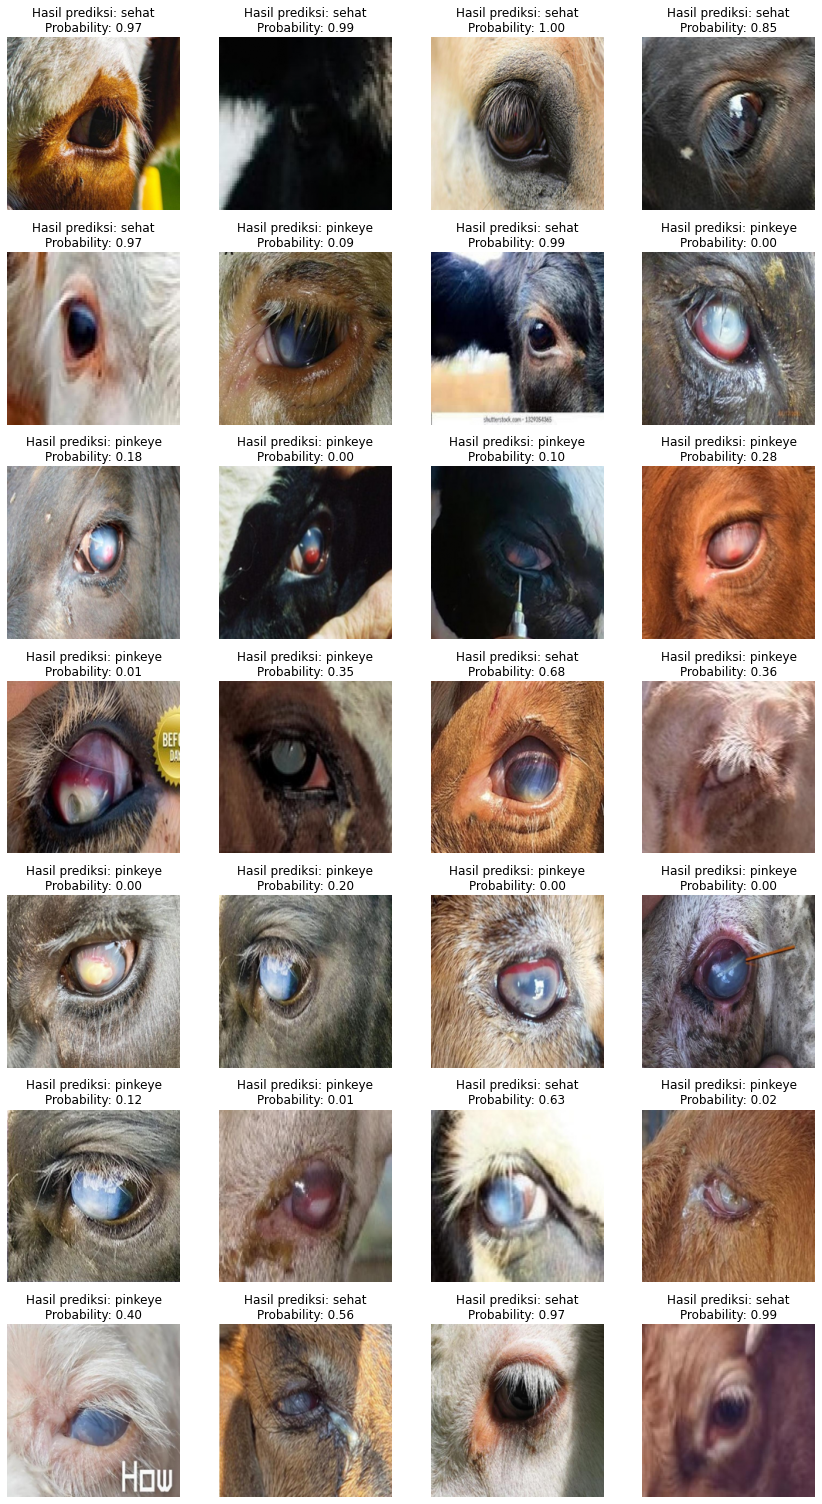

In [47]:
import os
from PIL import Image

# Mendapatkan daftar semua file gambar dalam folder tes
folder_path = r'D:\BANGKIT2023\CAPSTONE\foltes'
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

# Mengatur ukuran subplot berdasarkan jumlah gambar
num_images = len(image_files)
num_cols = 4
num_rows = (num_images + num_cols - 1) // num_cols

# Membuat subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

# Loop melalui setiap file gambar
for i, image_file in enumerate(image_files):
    image_path = os.path.join(folder_path, image_file)

    # Memuat dan memproses gambar
    test_image = Image.open(image_path)
    test_image = test_image.resize((image_size, image_size))
    test_image = np.array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image / 255.0  # Normalize the image

    # Memprediksi
    predictions = model.predict(test_image)

    # Probability dan kelas prediksi
    predicted_class = "pinkeye" if predictions[0][0] < 0.5 else "sehat"  # Replace with your class labels
    probability = predictions[0][0]

    # Menampilkan gambar dan hasil prediksi dalam subplot
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(test_image[0])
    ax.set_title(f'Hasil prediksi: {predicted_class}\nProbability: {probability:.2f}')
    ax.axis('off')

# Menghapus subplot yang tidak digunakan
if num_images < num_rows * num_cols:
    for i in range(num_images, num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()



In [ ]:
# model.save('model/sapifitmobilenet1.h5')